In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#load dataset CS student

In [125]:
df=pd.read_csv('/content/cs_students.csv')
df.head()

,Student ID,Name,Gender,Age,GPA,Major,Interested Domain,Projects,Future Career,Python,SQL,Java
0,1,John Smith,Male,21,3.5,Computer Science,Artificial Intelligence,Chatbot Development,Machine Learning Researcher,Strong,Strong,Weak
1,2,Alice Johnson,Female,20,3.2,Computer Science,Data Science,Data Analytics,Data Scientist,Average,Strong,Weak
2,3,Robert Davis,Male,22,3.8,Computer Science,Software Development,E-commerce Website,Software Engineer,Strong,Strong,Average
3,4,Emily Wilson,Female,21,3.7,Computer Science,Web Development,Full-Stack Web App,Web Developer,Weak,Strong,Strong
4,5,Michael Brown,Male,23,3.4,Computer Science,Cybersecurity,Network Security,Information Security Analyst,Average,Weak,Strong


In [126]:
#shape of dataset
df.shape

(180, 12)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student ID         180 non-null    int64  
 1   Name               180 non-null    object 
 2   Gender             180 non-null    object 
 3   Age                180 non-null    int64  
 4   GPA                180 non-null    float64
 5   Major              180 non-null    object 
 6   Interested Domain  180 non-null    object 
 7   Projects           180 non-null    object 
 8   Future Career      180 non-null    object 
 9   Python             180 non-null    object 
 10  SQL                180 non-null    object 
 11  Java               180 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 17.0+ KB


In [128]:
df.describe()

,Student ID,Age,GPA
count,180.000000,180.000000,180.000000
mean,90.500000,22.116667,3.615000
std,52.105662,2.823040,0.177341
min,1.000000,20.000000,3.200000
25%,45.750000,21.000000,3.500000
50%,90.500000,22.000000,3.600000
75%,135.250000,22.250000,3.700000
max,180.000000,37.000000,3.900000


In [129]:
#check the null value
df.isnull().sum()

,0
Student ID,0
Name,0
Gender,0
Age,0
GPA,0
Major,0
Interested Domain,0
Projects,0
Future Career,0
Python,0


In [130]:
#check the duplicated
df.duplicated().sum()

0

In [131]:
df['Interested Domain'].unique()

array(['Artificial Intelligence', 'Data Science', 'Software Development',
       'Web Development', 'Cybersecurity', 'Machine Learning',
       'Database Management', 'Cloud Computing', 'Mobile App Development',
       'Computer Graphics', 'Software Engineering', 'Network Security',
       'Game Development', 'Computer Vision', 'Bioinformatics',
       'IoT (Internet of Things)', 'Natural Language Processing',
       'Data Mining', 'Human-Computer Interaction',
       'Biomedical Computing', 'Quantum Computing',
       'Blockchain Technology', 'Information Retrieval', 'Data Privacy',
       'Geographic Information Systems', 'Distributed Systems',
       'Digital Forensics'], dtype=object)

In [132]:
#check the future career
df['Future Career'].unique()

array(['Machine Learning Researcher', 'Data Scientist',
       'Software Engineer', 'Web Developer',
       'Information Security Analyst', 'Machine Learning Engineer',
       'Database Administrator', 'Cloud Solutions Architect',
       'Mobile App Developer', 'Graphics Programmer',
       'NLP Research Scientist', 'Game Developer', 'Security Analyst',
       'Embedded Software Engineer', 'Data Analyst', 'Robotics Engineer',
       'Ethical Hacker', 'Computer Vision Engineer', 'DevOps Engineer',
       'Bioinformatician', 'IoT Developer', 'NLP Engineer', 'UX Designer',
       'Healthcare IT Specialist', 'Quantum Computing Researcher',
       'VR Developer', 'Blockchain Engineer', 'SEO Specialist',
       'Data Privacy Specialist', 'Geospatial Analyst',
       'Distributed Systems Engineer', 'Digital Forensics Specialist',
       'AI Researcher'], dtype=object)

In [133]:
#check the project
df['Projects'].unique()

array(['Chatbot Development', 'Data Analytics', 'E-commerce Website',
       'Full-Stack Web App', 'Network Security', 'Image Recognition',
       'SQL Query Optimization', 'AWS Deployment', 'Android App',
       '3D Rendering', 'Natural Language Processing', 'iOS App',
       'Game Development', 'GCP Deployment', 'Social Media Platform',
       'iOS Game', '3D Animation', 'Machine Learning', 'Android Game',
       '3D Modeling', 'Firewall Management', 'Deep Learning Models',
       'Data Warehouse Design', 'Embedded Systems',
       'Front-End Development', 'Statistical Analysis', 'Robotics',
       'Mobile Game Development', 'Penetration Testing',
       'Object Detection', 'DevOps', 'Genomic Data Analysis',
       'Smart Home Automation', 'Market Analysis',
       'Cloud Migration Specialist', 'Usability Testing',
       'Medical Imaging Analysis', 'Quantum Algorithm Development',
       'Virtual Reality Development', 'Smart Contracts Developer',
       'Search Engine Optimization',

In [134]:
#major type
df['Major'].unique()

array(['Computer Science'], dtype=object)

<Axes: xlabel='Gender', ylabel='count'>

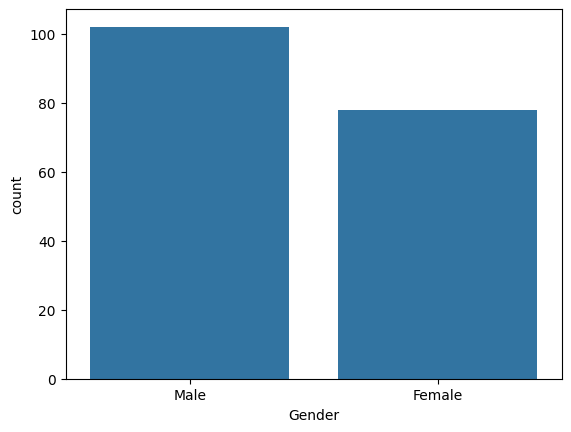

In [135]:
sns.countplot(x=df['Gender'])

<Axes: xlabel='Age', ylabel='count'>

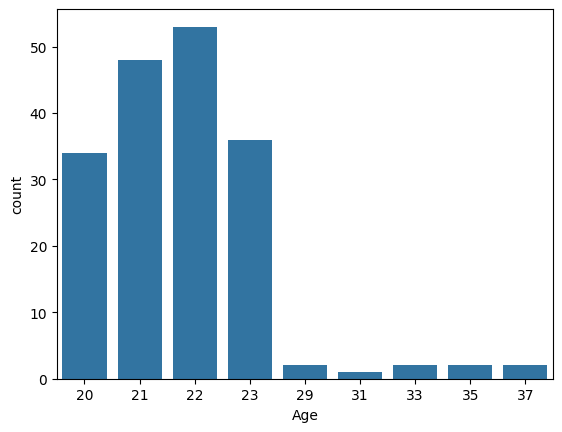

In [136]:
sns.countplot(x=df['Age'])

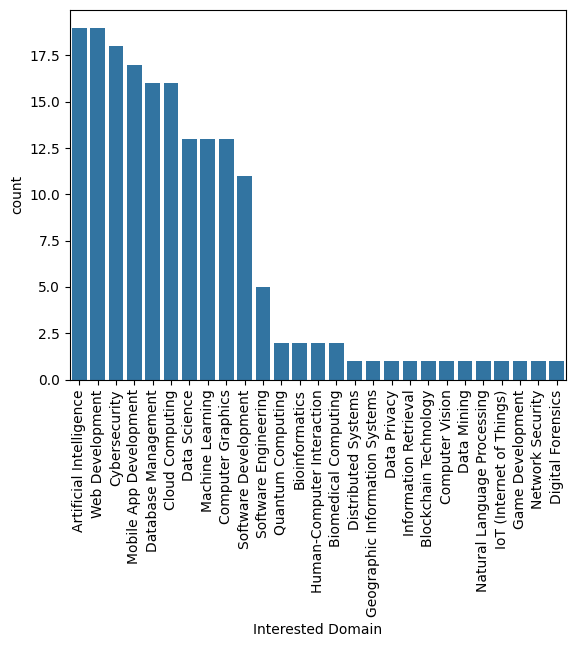

In [137]:
order = df['Interested Domain'].value_counts().index
sns.countplot(x='Interested Domain', data=df, order=order)
plt.xticks(rotation=90)
plt.show()

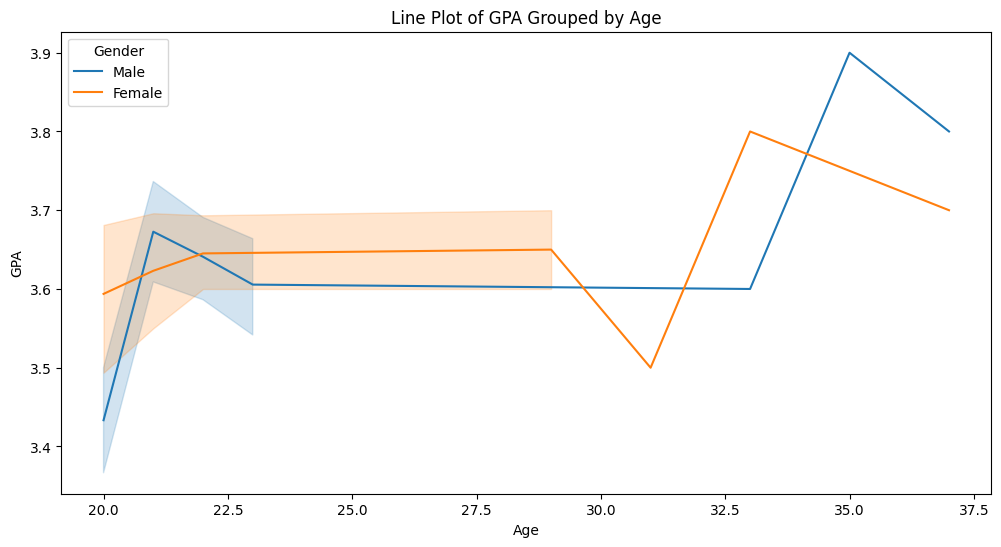

In [138]:
#Line Plot of GPA Grouped by Age
plt.figure(figsize=(12,6))
sns.lineplot(y=df["GPA"], x=df["Age"],hue=df["Gender"])
plt.title('Line Plot of GPA Grouped by Age')
plt.xlabel('Age')
plt.ylabel('GPA')
plt.show()

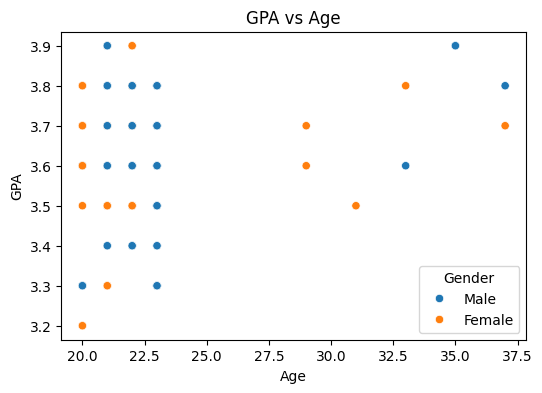

In [139]:
# Scatter Plot for GPA vs Age
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='GPA', hue='Gender', data=df)
plt.title('GPA vs Age')
plt.show()

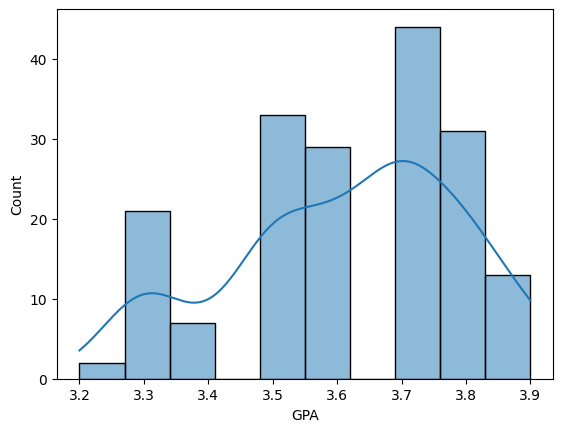

In [140]:
#gpa
sns.histplot(df['GPA'], kde=True)
plt.show()

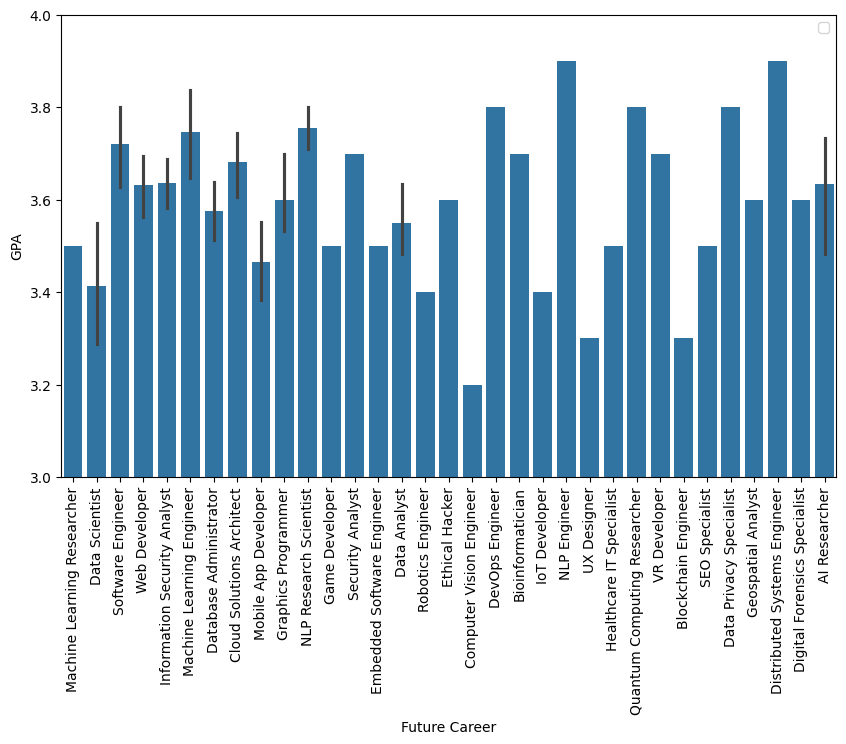

In [141]:
#Gpa compare with Future career
plt.figure(figsize = (10,6))
sns.barplot(y='GPA', x='Future Career', data = df)
plt.xlabel('Future Career')
plt.ylabel('GPA')
plt.ylim(3.0,4.0)
plt.xticks(rotation = 90)
plt.legend()
plt.show()

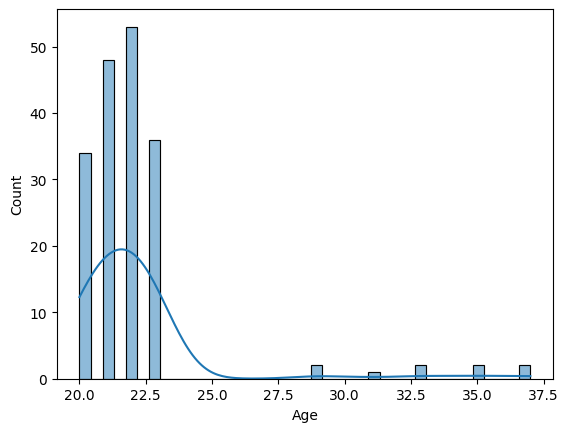

In [142]:
#age distribution
sns.histplot(df['Age'], kde=True)
plt.show()

In [143]:
df.columns

Index(['Student ID', 'Name', 'Gender', 'Age', 'GPA', 'Major',
       'Interested Domain', 'Projects', 'Future Career', 'Python', 'SQL',
       'Java'],
      dtype='object')

In [144]:
print(df['Python'].unique())
print(df['Java'].unique())
print(df['SQL'].unique())

['Strong' 'Average' 'Weak']
['Weak' 'Average' 'Strong']
['Strong' 'Weak' 'Average']


In [145]:
# Convert categorical features to numerical
sk = {'Weak': 1, 'Average': 2, 'Strong': 3}
df['Python'] = df['Python'].map(sk)
df['SQL'] = df['SQL'].map(sk)
df['Java'] = df['Java'].map(sk)

In [146]:
#check the categorical column
df.select_dtypes(include=['object']).columns

Index(['Name', 'Gender', 'Major', 'Interested Domain', 'Projects',
       'Future Career'],
      dtype='object')

In [147]:
# One-Hot Encoding for InterestedDomain, Projects, Gender
df = pd.get_dummies(df, columns=['Interested Domain', 'Projects', 'Gender'], drop_first=True)

In [148]:
# Target: Whether the student is pursuing Data Science (FutureCareer == 'Data Scientist')
df['is_data_scientist'] = df['Future Career'].apply(lambda x:1 if x=='Data Scientist'else 0)

In [149]:
df.head()

,Student ID,Name,Age,GPA,Major,Future Career,Python,SQL,Java,Interested Domain_Bioinformatics,...,Projects_Statistical Analysis,Projects_Usability Testing,Projects_User Experience Researcher,Projects_Virtual Reality Development,Projects_Web Application Development,Projects_iOS App,Projects_iOS App Development,Projects_iOS Game,Gender_Male,is_data_scientist
0,1,John Smith,21,3.5,Computer Science,Machine Learning Researcher,3,3,1,False,...,False,False,False,False,False,False,False,False,True,0
1,2,Alice Johnson,20,3.2,Computer Science,Data Scientist,2,3,1,False,...,False,False,False,False,False,False,False,False,False,1
2,3,Robert Davis,22,3.8,Computer Science,Software Engineer,3,3,2,False,...,False,False,False,False,False,False,False,False,True,0
3,4,Emily Wilson,21,3.7,Computer Science,Web Developer,1,3,3,False,...,False,False,False,False,False,False,False,False,False,0
4,5,Michael Brown,23,3.4,Computer Science,Information Security Analyst,2,1,3,False,...,False,False,False,False,False,False,False,False,True,0


#spliting data in X,y

In [152]:
# Splitting the data into features (X) and target (y)
# Remove irrelevant columns such as 'StudentID', 'Name', 'Major', and the target column itself 'FutureCareer'
X = df.drop(columns=['Student ID', 'Name', 'Major', 'Future Career', 'is_data_scientist'])
y = df['is_data_scientist']

#spliting data in train and test

In [157]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [174]:
X_train.shape

(144, 96)

#Apply classifiers model

In [167]:
# Apply different classifiers in foor loop
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [168]:
best_model = None
best_accuracy = 0
best_model_name = ""

In [169]:
# Loop through the classifiers
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.4f}")

    # Keep track of the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_model_name = model_name

#All  model accuracy print best model
print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

Logistic Regression Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
SVM Accuracy: 0.9722
Naive Bayes Accuracy: 1.0000
K-Nearest Neighbors Accuracy: 1.0000

Best Model: Logistic Regression with Accuracy: 1.0000


#save the model that trained recently

In [172]:
import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']